## Lending Club Case Study

In [1]:
#import libraries
import pandas as pd
import numpy as np

In [2]:
# read the dataset into a data frame

df = pd.read_csv('./loan.csv',parse_dates = ['next_pymnt_d'])

Get first look at the data

In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
df.shape

(39717, 111)

Get initial meta data for columns such as null and unique values

In [6]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
                              ...  
tax_liens                         1
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64

In [8]:
df.isna().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

## DATA CLEANUP


# Fixing Rows
| Checklist Item      | Analysis |
| ----------- | ----------- |
| Delete incorrect rows      | No such rows found       |
| Delete summary rows   | No such rows found        |
| Delete extra rows   | No such rows found        |

After manual checking of csv, no such rows found

# Fixing Columns
| Checklist Item      | Analysis |
| ----------- | ----------- |
| Add column names if missing      | No such columns found       |
| Rename columns   | No such columns found        |
| Delete unnecessary columns   | Columns with all empty values found        |
| Split columns for more data   | URL and date columns can be split, desc column has a date if required        |
| Merge columns for identifiers   | No such columns found        |
| Align misaligned columns   | No such columns found        |

In [9]:
# dropping columns which have no data
df.dropna(axis=1,how='all',inplace=True)
df.isna().sum().sort_values(ascending=False)

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12940
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
home_ownership                    0
int_rate                          0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
term                              0
last_pymnt_amnt                   0
initial_list_status               0
funded_amnt_inv             

# Fix Missing Values
| Checklist Item      | Analysis |
| ----------- | ----------- |
| Set values as missing values      | No such values found       |
| Delete rows, columns with significant missing values   | Two columns with more than 85% missing values identified       |
| Fill partial missing values using business judgement   | No such opportunity identified      |

In [10]:
# dropping columns with more than 85% missing values
df.drop(['next_pymnt_d','mths_since_last_record'], axis=1, inplace=True)
df.isna().sum().sort_values(ascending=False)

mths_since_last_delinq        25682
desc                          12940
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
out_prncp                         0
initial_list_status               0
out_prncp_inv                     0
total_pymnt                       0
total_acc                         0
total_pymnt_inv                   0
recoveries                        0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
pub_rec                           0
collection_recovery_fee           0
last_pymnt_amnt                   0
policy_code                       0
application_type                  0
acc_now_delinq              

# Standardising Values
| Checklist Item      | Analysis |
| ----------- | ----------- |
| Standardise units      |  Unit symbols - (months, %) can be removed   |
| Scale values if required   |   All units have proper scale     |
| Standardise precision   | Decimal precision can be brought to two decimal places     |

In [11]:
# remove unit symbols
df['term'] = df['term'].apply(lambda x: int(x.replace('months','').replace(' ','')))
df['int_rate'] = df['int_rate'].apply(lambda x: float(x.replace('%','')))
df['revol_util'] = df['revol_util'].apply(lambda x: float(str(x).replace('%','')))

In [12]:
# standardise decimal places
df.round({'funded_amnt_inv': 2, 'total_pymnt':2, 'total_rec_late_fee':2, 'total_pymnt_inv':2})

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36,8.07,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36,10.28,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36,8.07,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36,7.43,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


# Invalid Values
| Checklist Item      | Analysis |
| ----------- | ----------- |
| Encode unicode properly     |  All values are encoded correctly   |
| Convert incorrect data types   |    Data types have been fixed for int_rate, revol_util, term   |
| Correct values that go beyond range   | No such values found     |
| Correct values not in the list   |    No such values found  |
| Correct wrong structure   |  No such values found    |
| Validate internal rules   |  No such rules provided    |

# Filtering Data
| Checklist Item      | Analysis |
| ----------- | ----------- |
| Deduplicate data     |  No such rows found   |
| Filter rows   |  Only "Charged Off" loans are required for analysis     |
| Filter columns   | loan_amnt,  term, int_rate, grade, sub_grade,  annual_inc, purpose, dti, emp_length, issue_d, home_ownership,  verification_status |

In [13]:
# checking for duplicate rows
df[df.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


In [14]:
# filtering bad loans
charged_off_loans_df = df[(df["loan_status"] == "Charged Off")]
charged_off_loans_df["loan_status"].value_counts()

Charged Off    5627
Name: loan_status, dtype: int64

# Univariate Analysis

Analyzing each variable independently to reveal insights.

In [15]:
# importing libraries for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

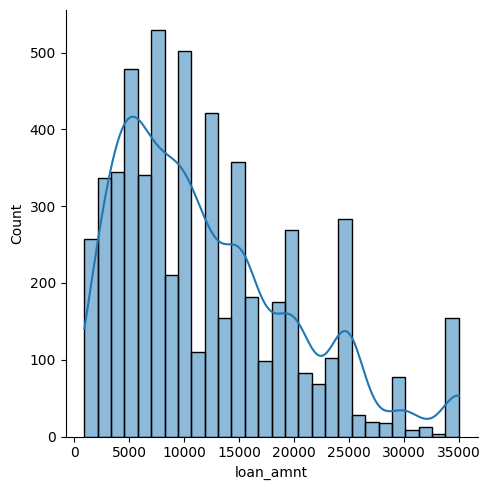

In [16]:
# loan amount
sns.displot(data=charged_off_loans_df, x="loan_amnt", kde=True)

In [17]:
charged_off_loans_df["loan_amnt"].describe()

count     5627.000000
mean     12104.385108
std       8085.732038
min        900.000000
25%       5600.000000
50%      10000.000000
75%      16500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<AxesSubplot: xlabel='loan_amnt'>

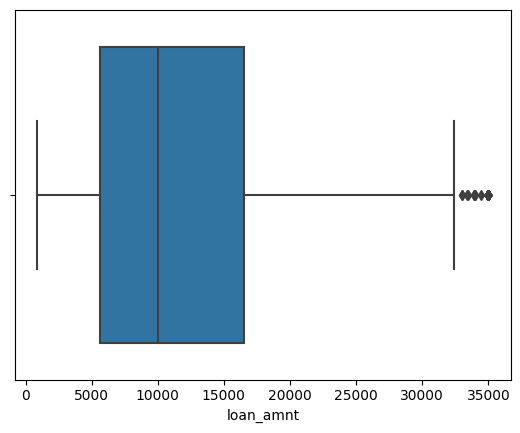

In [18]:
sns.boxplot(x=charged_off_loans_df['loan_amnt'])

In [19]:
charged_off_loans_df[(charged_off_loans_df['loan_amnt']>=35000)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
496,1063393,1295948,35000,23250,23225.00000,60,20.30,619.88,E,E5,...,619.88,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
765,1053763,1285365,35000,21350,21325.00000,60,20.89,576.27,F,F1,...,576.27,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
836,1059319,1291122,35000,22875,22875.00000,60,19.03,593.77,E,E2,...,31.28,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
887,1058824,1290419,35000,35000,35000.00000,60,20.89,944.71,F,F1,...,944.71,Dec-15,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1096,1056234,1287815,35000,23350,23350.00000,60,11.71,516.00,B,B3,...,516.00,Dec-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19027,683184,872476,35000,35000,12793.19224,60,16.02,851.51,D,D5,...,3000.00,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
19142,679239,867705,35000,35000,21068.32935,60,16.77,865.52,E,E2,...,32.06,Feb-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
19238,679046,867473,35000,35000,34993.26306,60,16.40,858.59,E,E1,...,200.33,Sep-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
19430,674982,862684,35000,35000,34969.06266,60,21.22,951.21,G,G4,...,952.25,Oct-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


## loan amount insights
- amounts range from 500 to 35000
- most charged off asked loans are around 10000

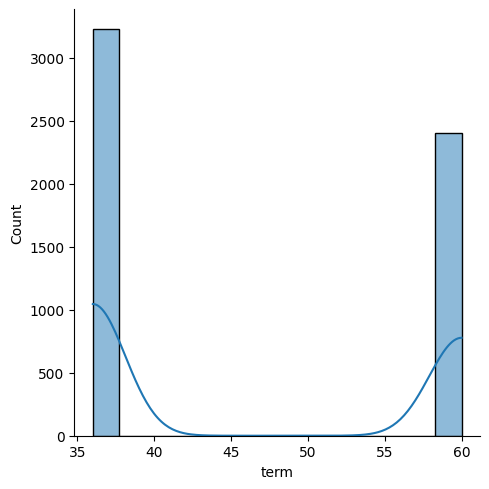

In [20]:
# term
sns.displot(data=charged_off_loans_df, x="term", kde=True)

In [21]:
charged_off_loans_df["term"].value_counts()

36    3227
60    2400
Name: term, dtype: int64

<AxesSubplot: xlabel='term'>

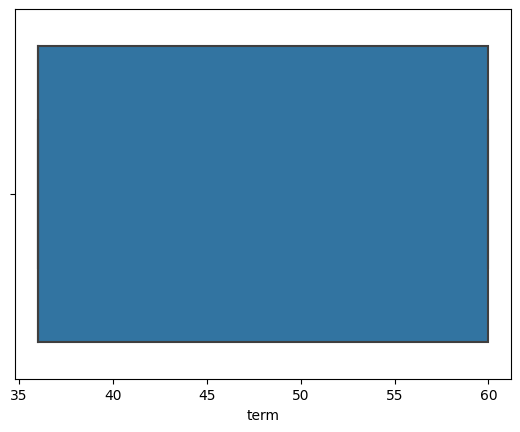

In [22]:
sns.boxplot(x=charged_off_loans_df['term'])

## term insights
- among the loans, only two term durations were given
  - 3 years
  - 5 years

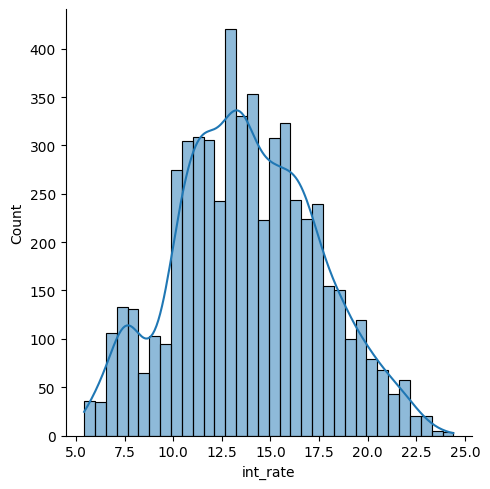

In [23]:
# int_rate
sns.displot(data=charged_off_loans_df, x="int_rate", kde=True)

In [24]:
charged_off_loans_df["int_rate"].describe()

count    5627.000000
mean       13.820432
std         3.654413
min         5.420000
25%        11.310000
50%        13.610000
75%        16.400000
max        24.400000
Name: int_rate, dtype: float64

<AxesSubplot: xlabel='int_rate'>

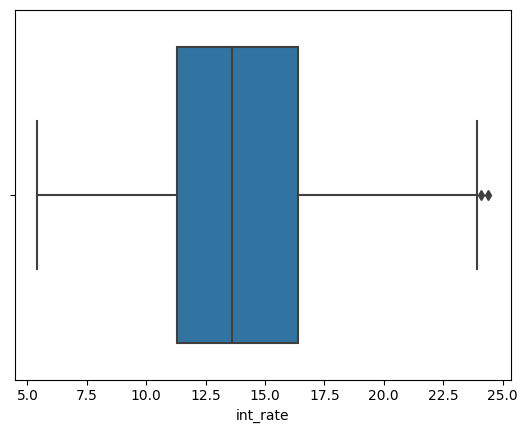

In [25]:
sns.boxplot(x=charged_off_loans_df['int_rate'])

## interest rate insights
- interest rates start from 5.4% and go all the way up to 24%
- most loans have an interest rate of around 10 to 15%

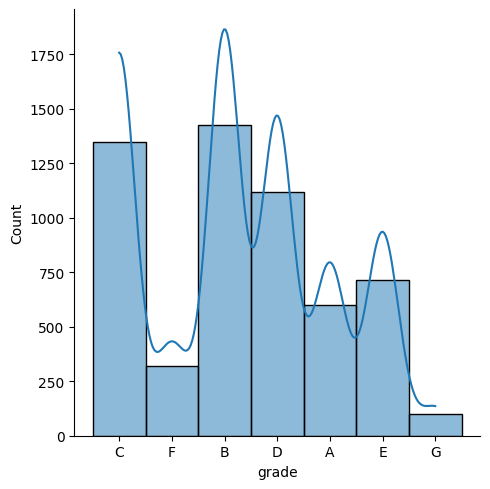

In [26]:
# grade
sns.displot(data=charged_off_loans_df, x="grade", kde=True)

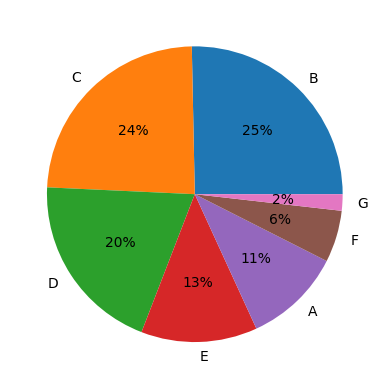

In [27]:
grades = charged_off_loans_df['grade'].value_counts()
plt.pie(grades,labels=grades.index,autopct="%.0f%%");


## grade insights
- majority of loans fall under  B, C, D grades
- very few loans fall under G, F grades

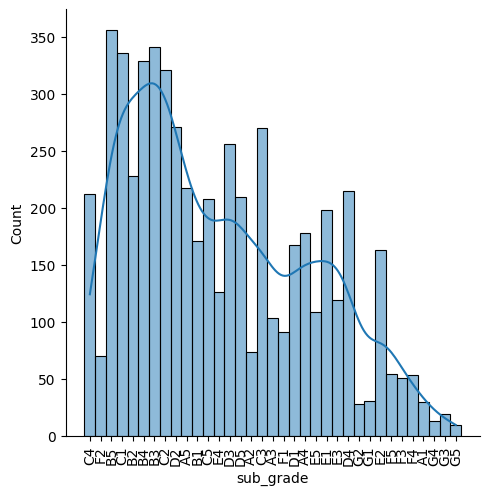

In [28]:
# sub grade
sns.displot(data=charged_off_loans_df, x="sub_grade", kde=True).set_xticklabels(rotation=90)

In [29]:
charged_off_loans_df['sub_grade'].value_counts()

B5    356
B3    341
C1    336
B4    329
C2    321
D2    271
C3    270
D3    256
B2    228
A5    217
D4    215
C4    212
D5    209
C5    208
E1    198
A4    178
B1    171
D1    167
E2    163
E4    126
E3    119
E5    109
A3    103
F1     91
A2     74
F2     70
F5     54
F4     53
F3     51
G1     31
A1     30
G2     28
G3     19
G4     13
G5     10
Name: sub_grade, dtype: int64

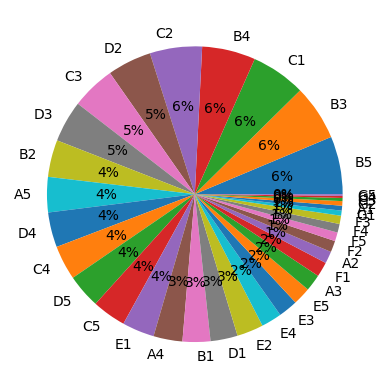

In [30]:
sub_grades = charged_off_loans_df['sub_grade'].value_counts()
plt.pie(sub_grades,labels=sub_grades.index,autopct="%.0f%%");

## sub-grade insights
- loans seem to have an equal distribution among the sub grades 

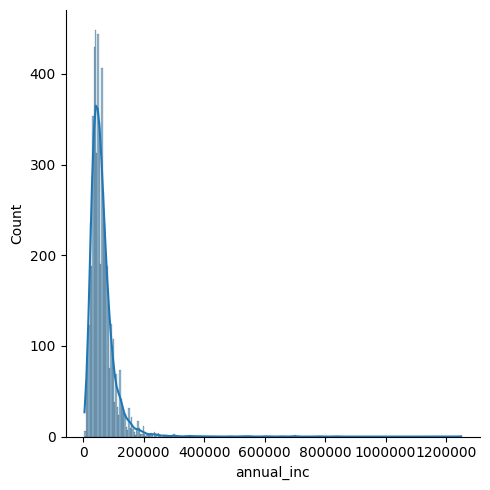

In [31]:
# annual income
sns.displot(data=charged_off_loans_df, x="annual_inc", kde=True)
plt.ticklabel_format(style='plain', axis='x') # this suppresses the scientific notation issue


In [32]:
charged_off_loans_df['annual_inc'].value_counts().sort_values(ascending=False)

60000.0     256
50000.0     164
40000.0     156
30000.0     139
36000.0     131
           ... 
54912.0       1
68496.0       1
700000.0      1
39100.0       1
33990.0       1
Name: annual_inc, Length: 1253, dtype: int64

In [33]:
charged_off_loans_df['annual_inc'].sort_values(ascending=False)

10621    1250000.00
30011     840000.00
25643     780000.00
26675     700053.85
34699     700000.00
            ...    
36687       8000.00
29517       6000.00
34116       6000.00
34268       4800.00
29283       4080.00
Name: annual_inc, Length: 5627, dtype: float64

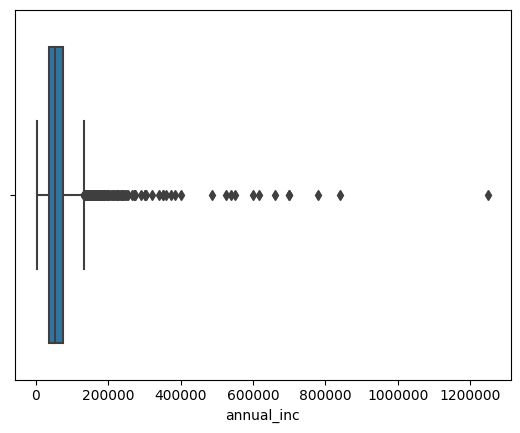

In [34]:
sns.boxplot(x=charged_off_loans_df['annual_inc'])
plt.ticklabel_format(style='plain', axis='x')


In [35]:
(charged_off_loans_df['annual_inc'] > 200000).sum()

60

In [36]:
charged_off_loans_df['annual_inc'].describe().apply(lambda x: format(x, 'f'))

count       5627.000000
mean       62427.298034
std        47776.014188
min         4080.000000
25%        37000.000000
50%        53000.000000
75%        75000.000000
max      1250000.000000
Name: annual_inc, dtype: object

In [37]:
# finding outliers
Q1 = charged_off_loans_df['annual_inc'].quantile(0.25)
Q3 = charged_off_loans_df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

outliers = charged_off_loans_df[((charged_off_loans_df['annual_inc'] < (Q1 - 1.5 * IQR)) |(charged_off_loans_df['annual_inc'] > (Q3 + 1.5 * IQR)))]
outliers['annual_inc'].sort_values()


6944      132600.00
7826      132725.38
20380     132996.00
7530      133000.00
32187     133000.00
            ...    
34699     700000.00
26675     700053.85
25643     780000.00
30011     840000.00
10621    1250000.00
Name: annual_inc, Length: 260, dtype: float64

In [38]:
outliers['annual_inc'].describe().apply(lambda x: format(x, 'f'))

count        260.000000
mean      201771.274269
std       125124.358357
min       132600.000000
25%       146556.250000
50%       160000.000000
75%       200000.000000
max      1250000.000000
Name: annual_inc, dtype: object

In [39]:
# removing outliers
# charged_off_loans_df = charged_off_loans_df[~((charged_off_loans_df['annual_inc'] < (Q1 - 1.5 * IQR)) |(charged_off_loans_df['annual_inc'] > (Q3 + 1.5 * IQR)))]

In [40]:
# charged_off_loans_df['annual_inc'].describe().apply(lambda x: format(x, 'f'))

## annual income insights
- outliers were detected above the 120000 income level
- majority of income distribution is around 30000 to 60000

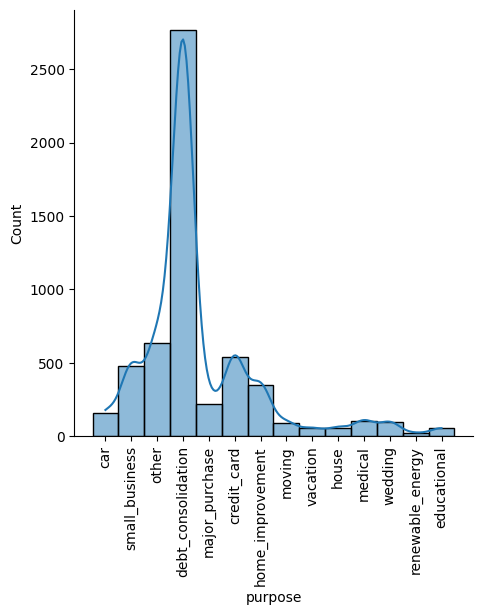

In [41]:
# purpose
sns.displot(data=charged_off_loans_df, x="purpose", kde=True).set_xticklabels(rotation=90)

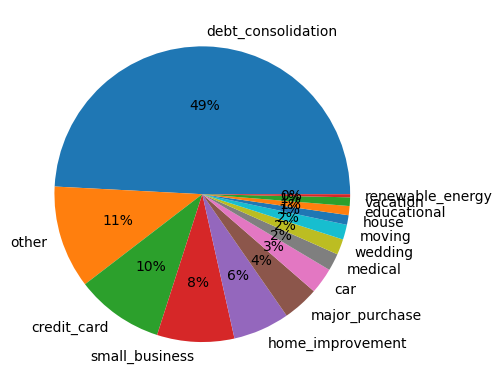

In [42]:
purpose = charged_off_loans_df['purpose'].value_counts()
plt.pie(purpose,labels=purpose.index,autopct="%.0f%%");

In [43]:
charged_off_loans_df['purpose'].value_counts()

debt_consolidation    2767
other                  633
credit_card            542
small_business         475
home_improvement       347
major_purchase         222
car                    160
medical                106
wedding                 96
moving                  92
house                   59
educational             56
vacation                53
renewable_energy        19
Name: purpose, dtype: int64

## purpose insights
- half of the loan applications were for debt consolidation, meaning people were asking for loan to clear other loans
- amongst the other half
  - credit card debt, small businesses and 'other' purposes were significant

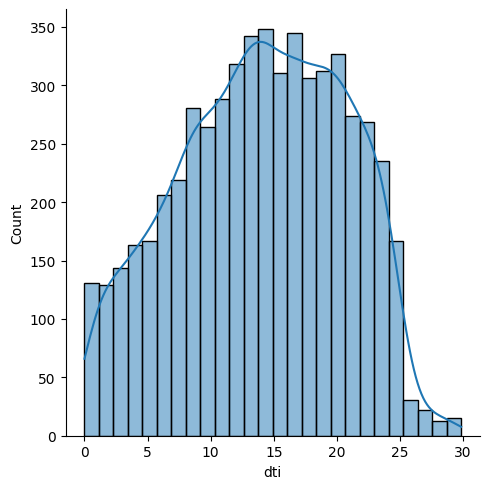

In [44]:
# debt to income ratio
sns.displot(data=charged_off_loans_df, x="dti", kde=True)

<AxesSubplot: xlabel='dti'>

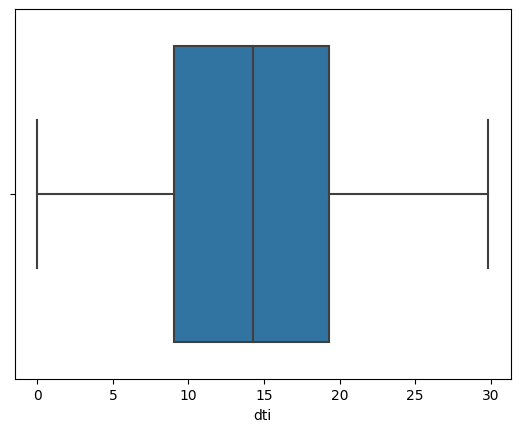

In [45]:
sns.boxplot(x=charged_off_loans_df['dti'])

In [46]:
charged_off_loans_df['dti'].sort_values(ascending=False)

137      29.85
17993    29.62
17542    29.60
11951    29.58
17973    29.45
         ...  
33164     0.00
11534     0.00
9961      0.00
35051     0.00
24440     0.00
Name: dti, Length: 5627, dtype: float64

## debt to income ratio insights
- amongst the charged off loans, dti was distributed mostly between 7.5 to 25%

According to [Wikipedia](https://www.investopedia.com/terms/d/dti.asp)
- A DTI of 43% is typically the highest ratio a borrower can have and still get qualified for a mortgage, but lenders generally seek ratios of no more than 36%.
- This shows that, while applying for the loans their dti were up to the standard.

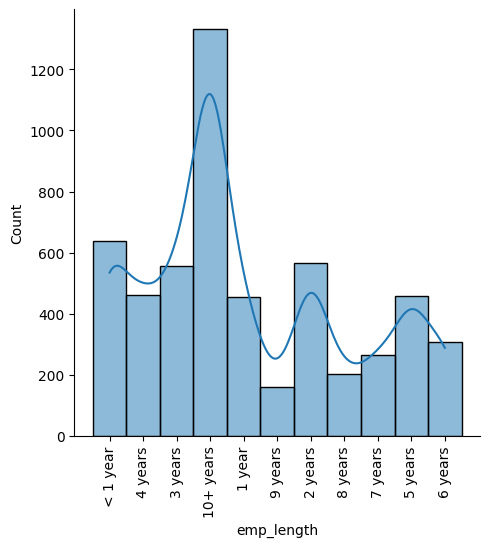

In [47]:
# employment length
sns.displot(data=charged_off_loans_df, x="emp_length", kde=True).set_xticklabels(rotation=90)

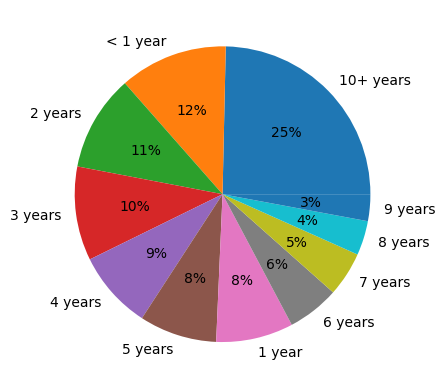

In [48]:
emp_length = charged_off_loans_df['emp_length'].value_counts()
plt.pie(emp_length,labels=emp_length.index,autopct="%.0f%%");

## employment length insights
- amongst the loans, about a quarter of loans had applicants with employment of more than 10 years
- more than half of the applications had employment of more than 5 years

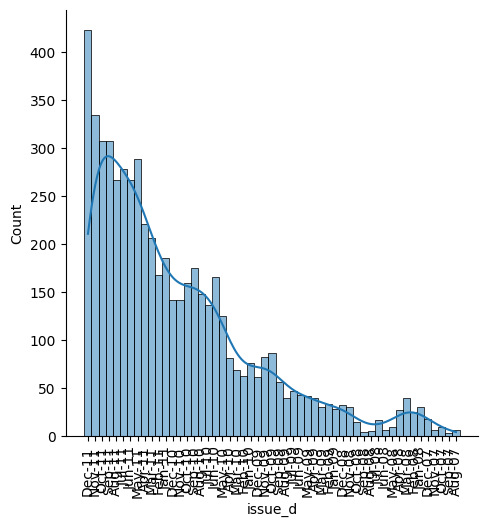

In [49]:
# issue date
sns.displot(data=charged_off_loans_df, x="issue_d", kde=True).set_xticklabels(rotation=90)

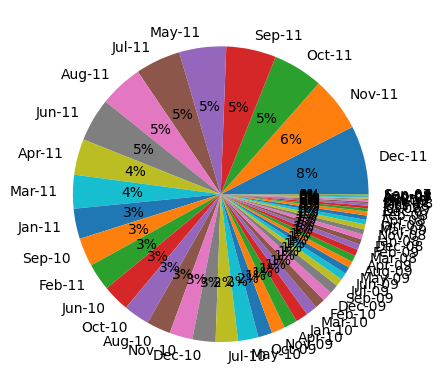

In [50]:
issue_d = charged_off_loans_df['issue_d'].value_counts()
plt.pie(issue_d,labels=issue_d.index,autopct="%.0f%%");

## issue date insights
- almost evenly distributed

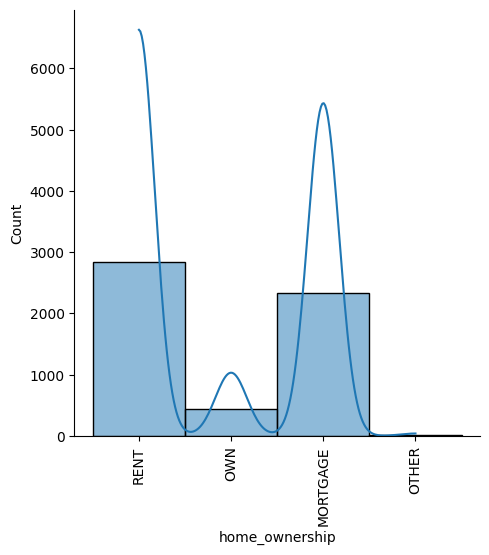

In [51]:
# home ownership
sns.displot(data=charged_off_loans_df, x="home_ownership", kde=True).set_xticklabels(rotation=90)

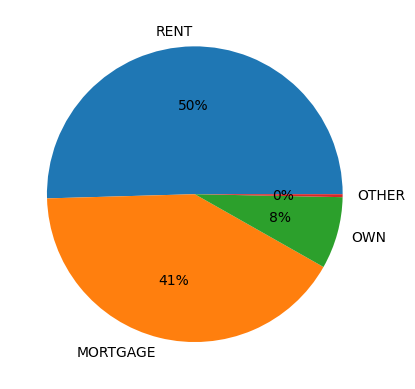

In [52]:
home_ownership = charged_off_loans_df['home_ownership'].value_counts()
plt.pie(home_ownership,labels=home_ownership.index,autopct="%.0f%%");

## home ownership insights
- more than 90% of loans don't own a home
- they are either living on rent or have an running mortgage

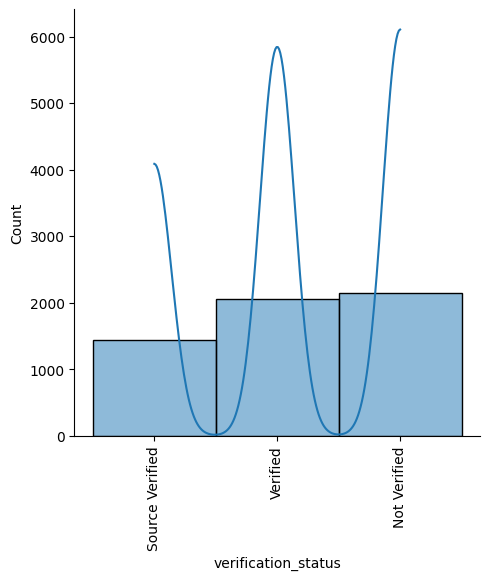

In [53]:
# verification status
sns.displot(data=charged_off_loans_df, x="verification_status", kde=True).set_xticklabels(rotation=90)

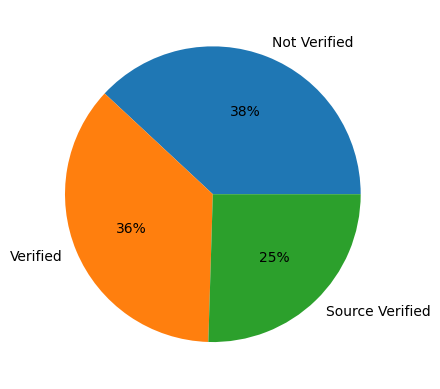

In [54]:
verification_status = charged_off_loans_df['verification_status'].value_counts()
plt.pie(verification_status,labels=verification_status.index,autopct="%.0f%%");

## verification status insights
- more than 50% of charged off loans had their income verified
- quarter of the applications had their income verified directly by the lending club

# Segmented Univariate Analysis

In [55]:
# by grade
charged_off_loans_df.groupby(by='grade').mean()

/var/folders/t_/lz6pz6gj6gng1mkk0pxszwkh0000gr/T/ipykernel_77524/3568915405.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  charged_off_loans_df.groupby(by='grade').mean()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
grade,,,,,,,,,,,,,,,,,,,,,
A,721034.149502,894850.715947,7799.916944,7625.664452,7341.764079,37.475083,7.595997,231.609518,52510.369385,13.346761,...,341.548331,50.656928,241.301694,0.0,1.0,0.0,0.0,0.0,0.015101,0.0
B,690900.189474,859212.145263,10905.771930,10564.421053,9746.235665,43.410526,11.122295,300.597768,59637.703916,13.818253,...,495.005377,56.447771,315.533677,0.0,1.0,0.0,0.0,0.0,0.050860,0.0
C,673741.183370,835760.426132,11044.469191,10763.214551,9758.630059,44.962138,13.598656,309.003638,58642.147253,14.429473,...,621.600211,93.565263,303.811886,0.0,1.0,0.0,0.0,0.0,0.076923,0.0
D,688266.425760,855552.202147,12204.651163,11914.646691,10872.651710,47.549195,15.840474,345.398104,62356.418372,13.969812,...,667.976531,88.659801,323.336127,0.0,1.0,0.0,0.0,0.0,0.081106,0.0
E,725182.184615,905475.292308,15849.825175,15270.104895,14326.427515,54.092308,17.858336,420.409259,73260.930741,14.176587,...,939.883893,113.096935,373.869273,0.0,1.0,0.0,0.0,0.0,0.086525,0.0
F,749782.006270,934800.294671,19272.570533,18520.532915,17515.786979,55.786834,19.994545,522.789091,80346.769248,14.014671,...,1510.986423,183.708465,456.128683,0.0,1.0,0.0,0.0,0.0,0.089457,0.0
G,727484.950495,909614.485149,18542.821782,18283.415842,16783.194773,55.009901,21.500000,535.947426,78869.332970,13.802574,...,1314.926535,170.085424,555.189505,0.0,1.0,0.0,0.0,0.0,0.118812,0.0


## grade insights
this is an ordered categorical

- as grade increases, average loan amount is increasing 
- as grade increases, average funded amount are increasing
- as grade increases, average term is increasing
- as grade increases, average interest rate is increasing
- as grade increases, average annual income is increasing
- as grade increases, dti is not varying much

In [56]:
# by purpose
charged_off_loans_df.groupby(by='purpose').mean()

/var/folders/t_/lz6pz6gj6gng1mkk0pxszwkh0000gr/T/ipykernel_77524/3054764978.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  charged_off_loans_df.groupby(by='purpose').mean()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
purpose,,,,,,,,,,,,,,,,,,,,,
car,693159.356250,863942.387500,7264.218750,7202.656250,6868.281351,47.700000,12.372813,200.307125,54560.024500,11.861187,...,400.718771,48.338399,202.954000,0.0,1.0,0.0,0.0,0.0,0.070064,0.0
credit_card,715177.592251,885843.448339,13014.944649,12546.125461,11612.983749,45.918819,13.405000,360.456199,64052.044207,15.419982,...,702.055889,110.969764,355.292804,0.0,1.0,0.0,0.0,0.0,0.086142,0.0
debt_consolidation,716512.425009,891527.833755,13517.925551,13130.375858,12317.396079,47.258403,14.275598,372.361713,61665.686657,15.144290,...,768.774682,93.988117,353.172891,0.0,1.0,0.0,0.0,0.0,0.074374,0.0
educational,428387.482143,510407.250000,7858.928571,7508.482143,6533.853472,39.000000,12.724107,243.307143,51711.803571,11.049821,...,441.193779,108.348682,413.872321,0.0,1.0,0.0,0.0,0.0,0.037736,0.0
home_improvement,679610.651297,846852.708934,11913.688761,11640.994236,10443.340438,45.821326,13.304006,331.612133,77190.188818,12.099683,...,472.299366,50.999091,294.079597,0.0,1.0,0.0,0.0,0.0,0.059172,0.0
house,679112.847458,844840.508475,12640.254237,12523.728814,11867.179484,48.610169,15.257966,352.212203,71540.468475,11.252373,...,892.936610,66.028073,409.931525,0.0,1.0,0.0,0.0,0.0,0.103448,0.0
major_purchase,643930.671171,808595.063063,9135.022523,8885.585586,7934.552435,45.189189,12.860495,257.208694,56707.545225,11.646441,...,509.542649,69.277665,255.791802,0.0,1.0,0.0,0.0,0.0,0.036697,0.0
medical,701678.500000,873091.358491,8568.396226,8568.396226,8092.450455,43.924528,13.322642,243.615472,57261.358491,12.220755,...,397.750566,46.817487,220.419245,0.0,1.0,0.0,0.0,0.0,0.066667,0.0
moving,713575.217391,893299.097826,5936.141304,5838.586957,5533.855103,40.695652,12.307717,175.979457,55533.760870,12.402500,...,216.379239,28.479893,181.049130,0.0,1.0,0.0,0.0,0.0,0.056180,0.0


## purpose insights
this is an unordered categorical

- maximum loan amounts were asked for debt consolidation and for small businesses
- minimum loan amounts were asked for moving and vacations

In [57]:
# by employment length
charged_off_loans_df.groupby(by='emp_length').mean()

/var/folders/t_/lz6pz6gj6gng1mkk0pxszwkh0000gr/T/ipykernel_77524/791250711.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  charged_off_loans_df.groupby(by='emp_length').mean()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
emp_length,,,,,,,,,,,,,,,,,,,,,
1 year,661595.502193,815328.552632,10663.322368,10217.543860,8787.095483,44.105263,13.650088,303.939605,54242.439211,13.971294,...,520.550275,83.161531,315.781798,0.0,1.0,0.0,0.0,0.0,0.033937,0.0
10+ years,725178.877536,902591.635612,14594.459053,14166.453794,13225.372225,48.640120,14.084515,393.198745,72578.473546,14.351052,...,871.924325,104.202248,369.107070,0.0,1.0,0.0,0.0,0.0,0.087490,0.0
2 years,671424.315697,834900.185185,10738.095238,10411.243386,9640.105898,44.931217,13.831781,305.871129,57409.903210,13.592346,...,586.117579,80.106108,305.955697,0.0,1.0,0.0,0.0,0.0,0.043165,0.0
3 years,690177.724324,862020.445045,11405.495495,11052.972973,10405.950099,45.643243,13.945748,319.416793,59601.141297,13.860685,...,553.055328,80.584574,292.452739,0.0,1.0,0.0,0.0,0.0,0.074681,0.0
4 years,682459.519481,849056.008658,11522.402597,11295.779221,10426.731813,45.506494,13.972965,328.675996,64417.025346,13.427814,...,617.530303,62.831491,323.707879,0.0,1.0,0.0,0.0,0.0,0.055556,0.0
5 years,719048.126638,896578.371179,12044.432314,11803.766376,11089.186341,46.847162,13.852336,336.485677,64249.784192,14.251354,...,664.754445,80.482672,304.485262,0.0,1.0,0.0,0.0,0.0,0.070485,0.0
6 years,741062.967427,921311.495114,12563.599349,12226.710098,11200.768137,47.100977,13.971889,346.245277,66101.841694,14.260456,...,738.708143,72.806815,329.479414,0.0,1.0,0.0,0.0,0.0,0.046512,0.0
7 years,705290.300380,877601.269962,12894.961977,12502.091255,11879.709673,47.771863,14.114715,349.320342,62575.109810,14.823422,...,551.773738,75.182356,309.390532,0.0,1.0,0.0,0.0,0.0,0.065891,0.0
8 years,703568.354680,872147.004926,13050.862069,12580.418719,11661.028337,46.876847,13.753793,356.178128,67778.180099,14.772118,...,787.806108,94.931582,367.989064,0.0,1.0,0.0,0.0,0.0,0.070000,0.0


## employment length insights
this is an ordered categorical

- as employment length increases, average annual income is increasing
- as employment length increases, requested loan amount is increasing
- as employment length increases, interest rate remained around 13-14%
- as employment length increases, average loan term remained around 45 years
- as employment length increases, dti varied between 13-14%

In [58]:
# by home ownership
charged_off_loans_df.groupby(by='home_ownership').mean()

/var/folders/t_/lz6pz6gj6gng1mkk0pxszwkh0000gr/T/ipykernel_77524/699552585.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  charged_off_loans_df.groupby(by='home_ownership').mean()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
home_ownership,,,,,,,,,,,,,,,,,,,,,
MORTGAGE,699630.408251,870835.098410,14095.186936,13587.236786,12534.848099,47.819510,13.794211,380.054018,75242.507172,14.230507,...,823.017189,102.884109,365.489703,0.0,1.0,0.0,0.0,0.0,0.078474,0.0
OTHER,393221.555556,437660.888889,13747.222222,13326.388889,9546.124229,37.333333,13.185556,444.305556,63433.055556,13.128889,...,644.832138,101.829478,376.910000,0.0,1.0,0.0,0.0,0.0,0.111111,0.0
OWN,697859.758465,869775.485327,11015.293454,10761.455982,9950.402801,46.347630,13.697856,307.466953,53908.049707,13.793521,...,674.018799,103.771486,339.211806,0.0,1.0,0.0,0.0,0.0,0.069767,0.0
RENT,698308.716802,867636.342022,10632.141599,10395.095104,9646.428774,44.977809,13.865076,304.003417,53246.224315,13.850042,...,548.277185,72.391168,291.289003,0.0,1.0,0.0,0.0,0.0,0.057194,0.0


## home ownership insights
this is an unordered categorical
- Mortgage applicants have higher average annual income
- Mortgage applicants are also the ones asking for higher loans with higher loan terms

In [59]:
# by verification status
charged_off_loans_df.groupby(by='verification_status').mean()[['loan_amnt','funded_amnt_inv']]

/var/folders/t_/lz6pz6gj6gng1mkk0pxszwkh0000gr/T/ipykernel_77524/1828439911.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  charged_off_loans_df.groupby(by='verification_status').mean()[['loan_amnt','funded_amnt_inv']]


,loan_amnt,funded_amnt_inv
verification_status,,
Not Verified,8667.238562,7308.538055
Source Verified,10686.506276,10040.727229
Verified,16685.372989,15154.251650


## verification status insights
this is an unordered categorical

- verified applicants received close to the amount requested
- surprisingly, unverified income source applicants got loans at a lower interest rate

# Bivariate analysis

In [60]:
# correlation matrix
charged_off_loans_df.corr()

/var/folders/t_/lz6pz6gj6gng1mkk0pxszwkh0000gr/T/ipykernel_77524/2841289618.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  charged_off_loans_df.corr()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
id,1.000000,0.994192,0.153415,0.167022,0.310973,0.288271,0.196032,0.083107,-0.011801,0.111235,...,0.065405,-0.050719,0.025868,NaN,NaN,NaN,NaN,NaN,-0.026409,NaN
member_id,0.994192,1.000000,0.148485,0.161690,0.319364,0.310796,0.197176,0.071906,-0.013352,0.111183,...,0.062211,-0.054522,0.021893,NaN,NaN,NaN,NaN,NaN,-0.022869,NaN
loan_amnt,0.153415,0.148485,1.000000,0.979134,0.907129,0.389484,0.351216,0.925911,0.352359,0.063872,...,0.310185,0.157602,0.332981,NaN,NaN,NaN,NaN,NaN,-0.028286,NaN
funded_amnt,0.167022,0.161690,0.979134,1.000000,0.926996,0.372881,0.353906,0.953826,0.347131,0.060861,...,0.316077,0.164236,0.338804,NaN,NaN,NaN,NaN,NaN,-0.033212,NaN
funded_amnt_inv,0.310973,0.319364,0.907129,0.926996,1.000000,0.422297,0.369863,0.858041,0.314505,0.072924,...,0.301537,0.138645,0.291813,NaN,NaN,NaN,NaN,NaN,-0.036099,NaN
term,0.288271,0.310796,0.389484,0.372881,0.422297,1.000000,0.455916,0.134187,0.079099,0.063872,...,0.130610,0.004217,0.047997,NaN,NaN,NaN,NaN,NaN,0.017173,NaN
int_rate,0.196032,0.197176,0.351216,0.353906,0.369863,0.455916,1.000000,0.327909,0.132252,0.040607,...,0.159769,0.072141,0.093077,NaN,NaN,NaN,NaN,NaN,0.074839,NaN
installment,0.083107,0.071906,0.925911,0.953826,0.858041,0.134187,0.327909,1.000000,0.358656,0.042358,...,0.300368,0.185040,0.350428,NaN,NaN,NaN,NaN,NaN,-0.025611,NaN
annual_inc,-0.011801,-0.013352,0.352359,0.347131,0.314505,0.079099,0.132252,0.358656,1.000000,-0.089725,...,0.134942,0.087584,0.130603,NaN,NaN,NaN,NaN,NaN,-0.004122,NaN
dti,0.111235,0.111183,0.063872,0.060861,0.072924,0.063872,0.040607,0.042358,-0.089725,1.000000,...,0.030623,0.006795,0.000367,NaN,NaN,NaN,NaN,NaN,0.018904,NaN


In [61]:
# sns.heatmap(charged_off_loans_df.corr(), annot=True, fmt="g", cmap='viridis')

In [62]:
# loan amount vs purpose
pd.pivot_table(charged_off_loans_df, values=['loan_amnt'], index=['purpose'], aggfunc=np.mean)


,loan_amnt
purpose,
car,7264.218750
credit_card,13014.944649
debt_consolidation,13517.925551
educational,7858.928571
home_improvement,11913.688761
house,12640.254237
major_purchase,9135.022523
medical,8568.396226
moving,5936.141304


In [63]:
# loan amount vs employment length
pd.pivot_table(charged_off_loans_df, values=['loan_amnt'], index=['emp_length'], aggfunc=np.mean)


,loan_amnt
emp_length,
1 year,10663.322368
10+ years,14594.459053
2 years,10738.095238
3 years,11405.495495
4 years,11522.402597
5 years,12044.432314
6 years,12563.599349
7 years,12894.961977
8 years,13050.862069


In [64]:
# loan amount vs home ownership
pd.pivot_table(charged_off_loans_df, values=['loan_amnt'], index=['home_ownership'], aggfunc=np.mean)


,loan_amnt
home_ownership,
MORTGAGE,14095.186936
OTHER,13747.222222
OWN,11015.293454
RENT,10632.141599


In [65]:
# loan amount vs grade
pd.pivot_table(charged_off_loans_df, values=['loan_amnt'],columns=['grade'] ,index=['sub_grade'], aggfunc=np.mean)


loan_amnt                                            \
grade                A             B             C             D   
sub_grade                                                          
A1         7223.333333           NaN           NaN           NaN   
A2         6781.418919           NaN           NaN           NaN   
A3         7682.524272           NaN           NaN           NaN   
A4         7982.303371           NaN           NaN           NaN   
A5         8133.064516           NaN           NaN           NaN   
B1                 NaN   9011.111111           NaN           NaN   
B2                 NaN   9701.315789           NaN           NaN   
B3                 NaN  11312.390029           NaN           NaN   
B4                 NaN  11531.990881           NaN           NaN   
B5                 NaN  11619.030899           NaN           NaN   
C1                 NaN           NaN  11491.889881           NaN   
C2                 NaN           NaN  11158.333333           NaN   
C3                 NaN           NaN  10736.111111           NaN   
C4                 NaN           NaN  10891.745283           NaN   
C5                 NaN           NaN  10701.923077           NaN   
D1                 NaN           NaN           NaN   9563.772455   
D2                 NaN           NaN           NaN  10744.095941   
D3                 NaN           NaN           NaN  13354.101562   
D4                 NaN           NaN           NaN  12799.767442   
D5                 NaN           NaN           NaN  14188.516746   
E1                 NaN           NaN           NaN           NaN   
E2                 NaN           NaN           NaN           NaN   
E3                 NaN           NaN           NaN           NaN   
E4                 NaN           NaN           NaN           NaN   
E5                 NaN           NaN           NaN           NaN   
F1                 NaN           NaN           NaN           NaN   
F2                 NaN           NaN           NaN           NaN   
F3                 NaN           NaN           NaN           NaN   
F4                 NaN           NaN           NaN           NaN   
F5                 NaN           NaN           NaN           NaN   
G1                 NaN           NaN           NaN           NaN   
G2                 NaN           NaN           NaN           NaN   
G3                 NaN           NaN           NaN           NaN   
G4                 NaN           NaN           NaN           NaN   
G5                 NaN           NaN           NaN           NaN   

                                                     
grade                 E             F             G  
sub_grade                                            
A1                  NaN           NaN           NaN  
A2                  NaN           NaN           NaN  
A3                  NaN           NaN           NaN  
A4                  NaN           NaN           NaN  
A5                  NaN           NaN           NaN  
B1                  NaN           NaN           NaN  
B2                  NaN           NaN           NaN  
B3                  NaN           NaN           NaN  
B4                  NaN           NaN           NaN  
B5                  NaN           NaN           NaN  
C1                  NaN           NaN           NaN  
C2                  NaN           NaN           NaN  
C3                  NaN           NaN           NaN  
C4                  NaN           NaN           NaN  
C5                  NaN           NaN           NaN  
D1                  NaN           NaN           NaN  
D2                  NaN           NaN           NaN  
D3                  NaN           NaN           NaN  
D4                  NaN           NaN           NaN  
D5                  NaN           NaN           NaN  
E1         15041.540404           NaN           NaN  
E2         15529.294479           NaN           NaN  
E3         15045.588235           NaN           NaN  
E4         16203.373016 

<AxesSubplot: xlabel='grade', ylabel='loan_amnt'>

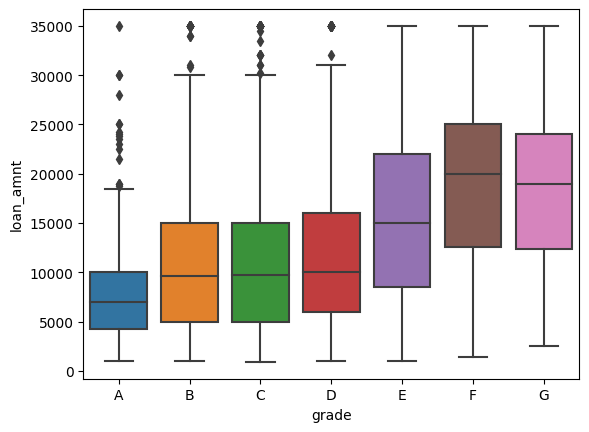

In [66]:
# box plot for loan amount vs grade
sns.boxplot(data=charged_off_loans_df,x='grade',y='loan_amnt',order=['A','B','C','D','E','F','G'])

[Text(0, 0, 'car'),
 Text(1, 0, 'small_business'),
 Text(2, 0, 'other'),
 Text(3, 0, 'debt_consolidation'),
 Text(4, 0, 'major_purchase'),
 Text(5, 0, 'credit_card'),
 Text(6, 0, 'home_improvement'),
 Text(7, 0, 'moving'),
 Text(8, 0, 'vacation'),
 Text(9, 0, 'house'),
 Text(10, 0, 'medical'),
 Text(11, 0, 'wedding'),
 Text(12, 0, 'renewable_energy'),
 Text(13, 0, 'educational')]

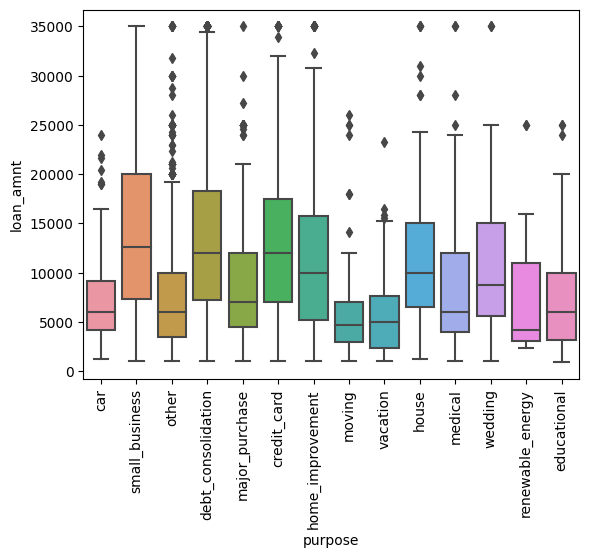

In [67]:
# box plot for loan amount vs purpose
ax = sns.boxplot(data=charged_off_loans_df,x='purpose',y='loan_amnt')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

<AxesSubplot: xlabel='loan_amnt', ylabel='int_rate'>

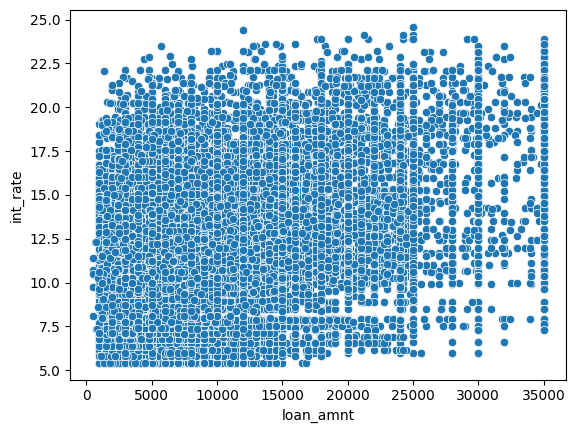

In [68]:
sns.scatterplot(data=df,x='loan_amnt',y='int_rate')

<AxesSubplot: xlabel='loan_amnt', ylabel='annual_inc'>

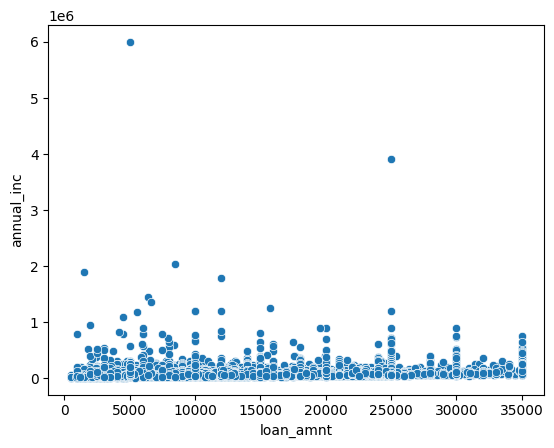

In [69]:
sns.scatterplot(data=df,x='loan_amnt',y='annual_inc')

<AxesSubplot: xlabel='loan_amnt', ylabel='dti'>

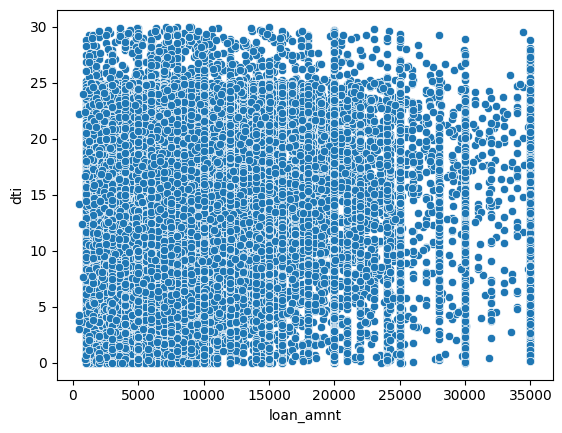

In [70]:
sns.scatterplot(data=df,x='loan_amnt',y='dti')

## Derived metrics
% of loan given vs asked

In [71]:
df['percentage_delivered'] = df['funded_amnt_inv'] / df['loan_amnt'] * 100

In [72]:
df['loan_amnt_to_income'] = df['loan_amnt'] / df['annual_inc'] * 100

# Compare good with bad loans

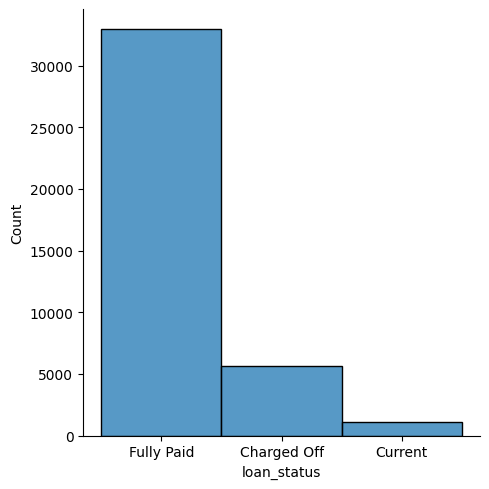

In [73]:
sns.displot(data=df,x='loan_status')

<AxesSubplot: xlabel='loan_status', ylabel='count'>

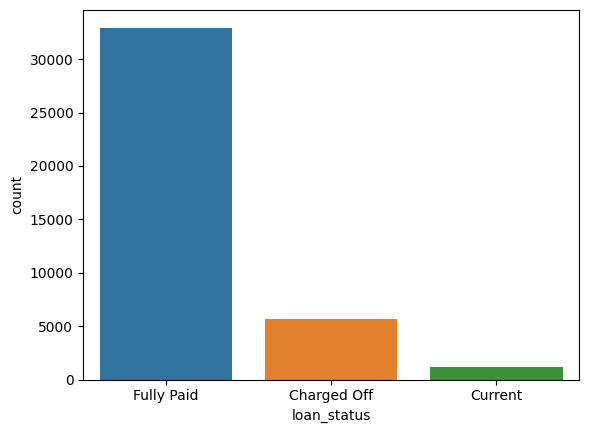

In [74]:
sns.countplot(data=df,x='loan_status')

In [75]:
df['loan_status'].describe()

count          39717
unique             3
top       Fully Paid
freq           32950
Name: loan_status, dtype: object

In [76]:
df['loan_status'].value_counts() * 100 / df.shape[0]

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

## loan status insights
- more than 80% of the loans have been fully paid

<AxesSubplot: xlabel='loan_status', ylabel='loan_amnt'>

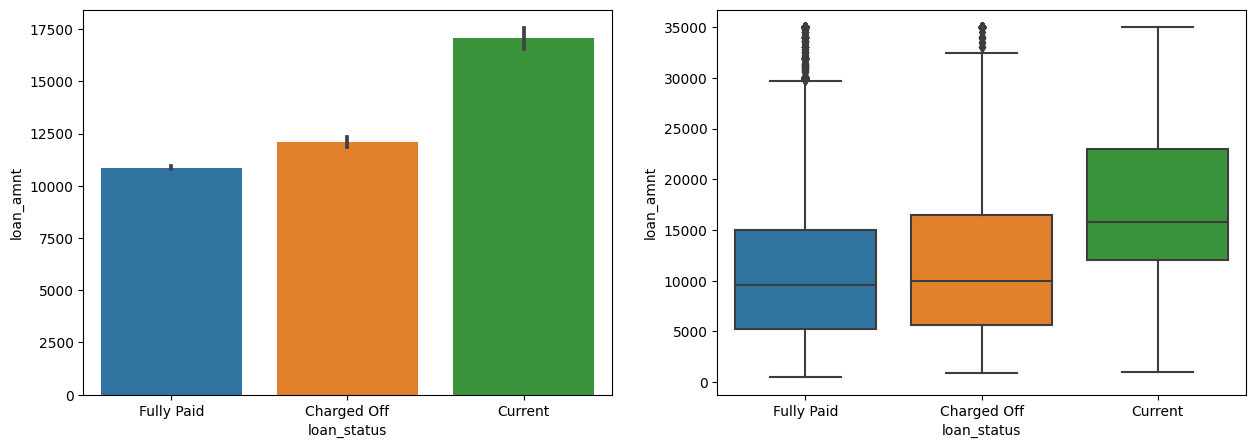

In [77]:
# loan amount vs status
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)

sns.barplot(ax=axes[0],data=df,x='loan_status',y='loan_amnt')
sns.boxplot(ax=axes[1],data=df,x='loan_status',y='loan_amnt')

<AxesSubplot: xlabel='loan_status', ylabel='count'>

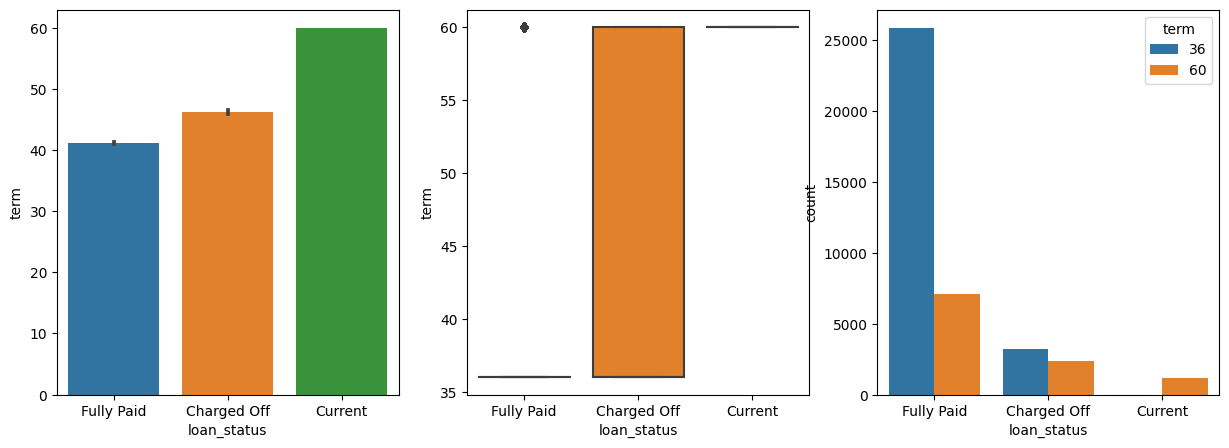

In [78]:
# term vs status
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
sns.barplot(ax=axes[0],data=df,x='loan_status',y='term')
sns.boxplot(ax=axes[1],data=df,x='loan_status',y='term')
sns.countplot(ax=axes[2],data=df,x='loan_status',hue='term')

<AxesSubplot: xlabel='loan_status', ylabel='int_rate'>

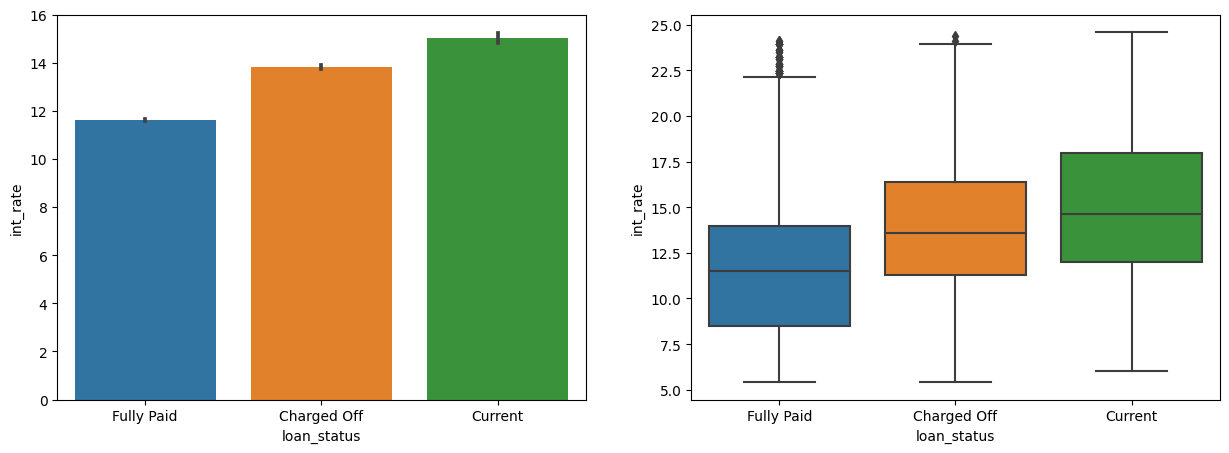

In [79]:
# int_rate vs status
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)

sns.barplot(ax=axes[0],data=df,x='loan_status',y='int_rate')
sns.boxplot(ax=axes[1],data=df,x='loan_status',y='int_rate')

<AxesSubplot: xlabel='loan_status', ylabel='annual_inc'>

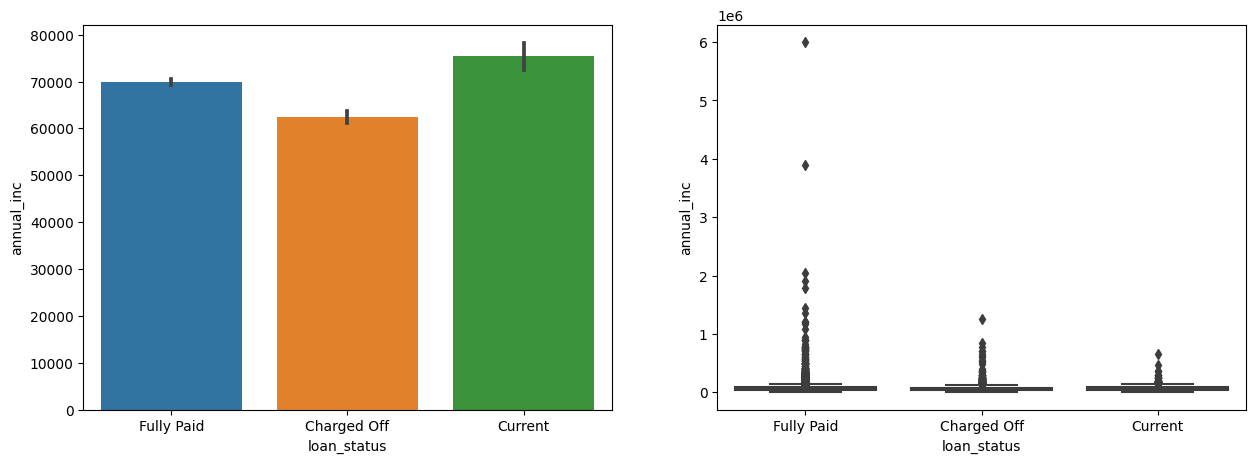

In [80]:
# annual income vs status
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)

sns.barplot(ax=axes[0],data=df,x='loan_status',y='annual_inc')
sns.boxplot(ax=axes[1],data=df,x='loan_status',y='annual_inc')

<AxesSubplot: xlabel='loan_status', ylabel='annual_inc'>

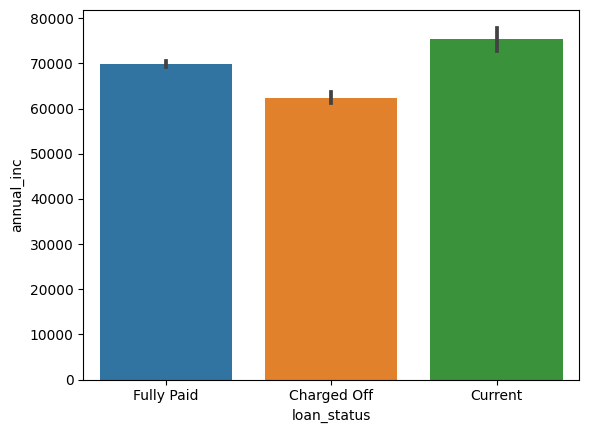

In [81]:
sns.barplot(data=df,x='loan_status',y='annual_inc')

## insight
- income under 70000 are likely to default

<AxesSubplot: xlabel='loan_status', ylabel='count'>

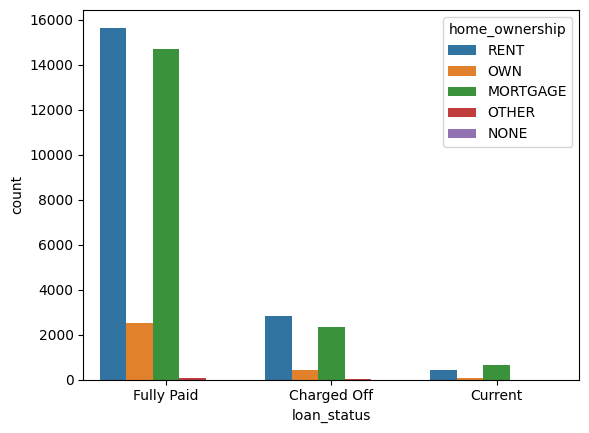

In [82]:
# status with home ownership
sns.countplot(data=df,x='loan_status', hue='home_ownership')

## insight
- people who are already having a mortgage loan or are paying rents are more likely to default

<AxesSubplot: xlabel='loan_status', ylabel='count'>

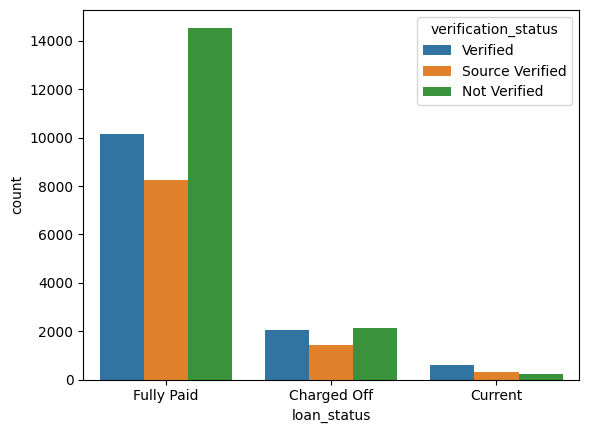

In [83]:
# status with verification status
sns.countplot(data=df,x='loan_status', hue='verification_status')

## insight
- verified and unverified loans have same chances of defaulting

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '< 1 year'),
  Text(1, 0, '1 year'),
  Text(2, 0, '2 years'),
  Text(3, 0, '3 years'),
  Text(4, 0, '4 years'),
  Text(5, 0, '5 years'),
  Text(6, 0, '6 years'),
  Text(7, 0, '7 years'),
  Text(8, 0, '8 years'),
  Text(9, 0, '9 years'),
  Text(10, 0, '10+ years')])

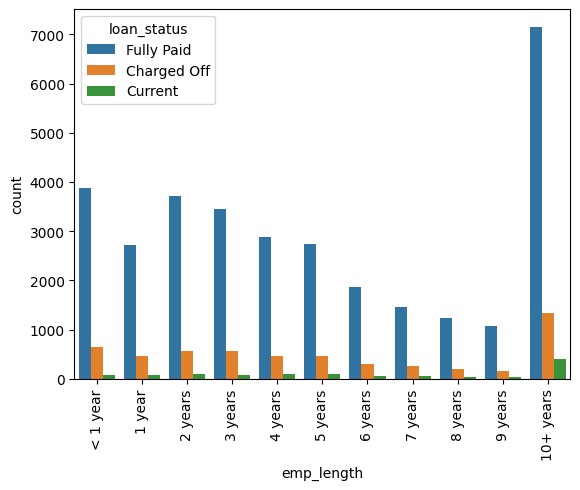

In [84]:
# status with employment length
# emp_length_order = df.groupby(by='emp_length').mean().sort_values('emp_length').index

sns.countplot(data=df,x='emp_length', hue='loan_status',order=[
    '< 1 year',
    '1 year',
    '2 years',
    '3 years',
    '4 years',
    '5 years',
    '6 years',
    '7 years',
    '8 years',
    '9 years',
    '10+ years'
])
plt.xticks(rotation=90)

## insight
- same pattern is observed across employment years

<AxesSubplot: xlabel='loan_status', ylabel='delinq_2yrs'>

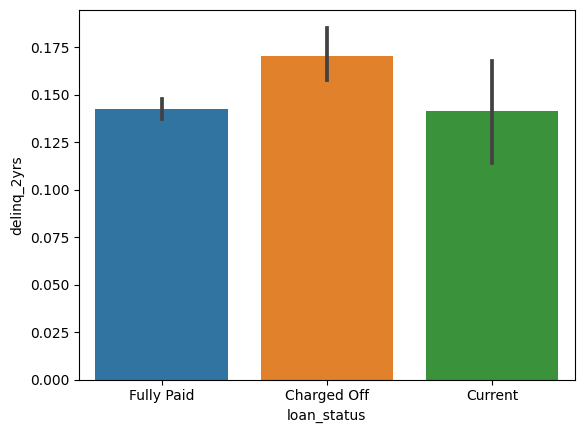

In [85]:
# number of delinquent accounts vs status
sns.barplot(data=df, x='loan_status',y='delinq_2yrs')


In [86]:
pd.pivot_table(df, values=['delinq_2yrs'], index=['loan_status'], aggfunc=np.mean)


,delinq_2yrs
loan_status,
Charged Off,0.170606
Current,0.141228
Fully Paid,0.142580


<AxesSubplot: xlabel='loan_status', ylabel='revol_util'>

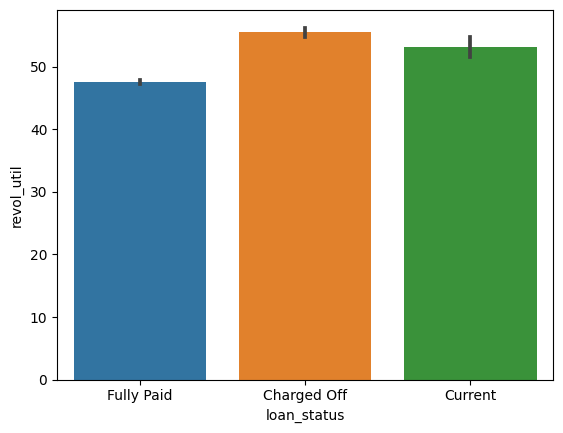

In [87]:
sns.barplot(data=df, x='loan_status',y='revol_util')


## insight
Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
 - if revol_util is more than 50%, they are likely to default


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'car'),
  Text(2, 0, 'small_business'),
  Text(3, 0, 'other'),
  Text(4, 0, 'wedding'),
  Text(5, 0, 'debt_consolidation'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'major_purchase'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

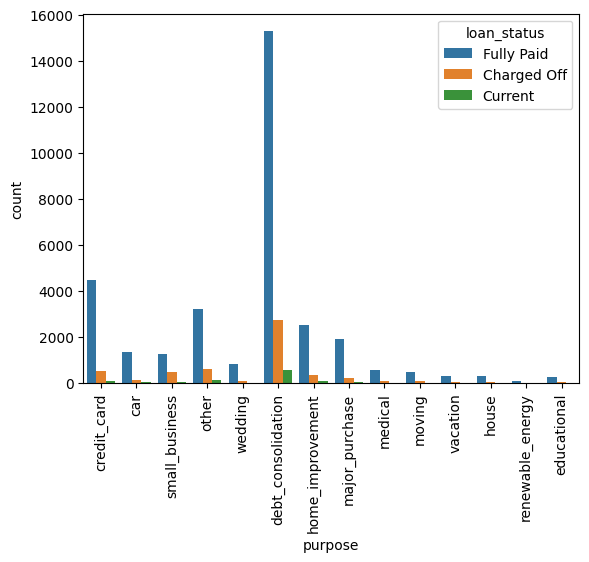

In [88]:
sns.countplot(data=df, x='purpose',hue='loan_status')
plt.xticks(rotation=90)


In [89]:
pd.pivot_table(df, index=['loan_status'], columns=['purpose'], values=['loan_amnt'], aggfunc=np.mean)


loan_amnt                                                \
purpose              car   credit_card debt_consolidation  educational   
loan_status                                                              
Charged Off  7264.218750  13014.944649       13517.925551  7858.928571   
Current      7700.500000  19151.941748       18596.203072          NaN   
Fully Paid   6684.895444  11396.967670       12319.847266  6592.193309   

                                                                         \
purpose     home_improvement         house major_purchase       medical   
loan_status                                                               
Charged Off     11913.688761  12640.254237    9135.022523   8568.396226   
Current         18061.633663  21396.428571   12968.243243  16260.416667   
Fully Paid      11224.861551  12775.081169    7950.272303   8040.608696   

                                                                         \
purpose            moving         other renewable_energy small_business   
loan_status                                                               
Charged Off   5936.141304   8284.873618      8421.052632   14604.894737   
Current      13410.714286  12029.101562     27000.000000   18359.121622   
Fully Paid    6688.119835   7868.169864      8564.759036   12904.671618   

                                        
purpose         vacation       wedding  
loan_status                             
Charged Off  5875.943396  10786.979167  
Current      8320.833333  15175.000000  
Fully Paid   5342.158385   9636.596386

## insight
- small business loans are riskier

<AxesSubplot: xlabel='addr_state', ylabel='count'>

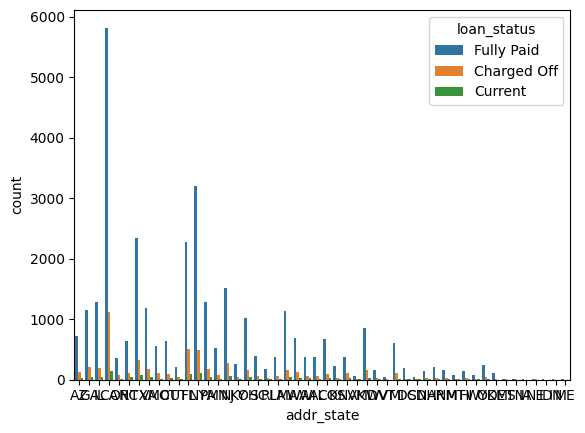

In [90]:
sns.countplot(data=df, x='addr_state',hue='loan_status')


In [91]:
df.groupby(by=['addr_state','loan_status'])['loan_amnt'].mean()

addr_state  loan_status
AK          Charged Off    14058.333333
            Current        29000.000000
            Fully Paid     12228.968254
AL          Charged Off    13130.092593
            Current        20880.882353
                               ...     
WV          Current        20300.000000
            Fully Paid     10338.907285
WY          Charged Off    16250.000000
            Current        22333.333333
            Fully Paid     10348.684211
Name: loan_amnt, Length: 140, dtype: float64

In [92]:
pd.pivot_table(df, index=['loan_status'], columns=['addr_state'], values=['loan_amnt'], aggfunc=np.mean)


loan_amnt                                            \
addr_state             AK            AL            AR            AZ   
loan_status                                                           
Charged Off  14058.333333  13130.092593  10161.111111  11997.560976   
Current      29000.000000  20880.882353  17002.500000  17443.333333   
Fully Paid   12228.968254  10660.433071  10373.557692  10502.238292   

                                                                     \
addr_state             CA            CO            CT            DC   
loan_status                                                           
Charged Off  12212.866667  12654.336735  11470.744681  13633.333333   
Current      16214.833333  16803.846154  18666.000000  20666.666667   
Fully Paid   11021.226820  11124.625749  11241.257911  12172.704082   

                                         ...                              \
addr_state             DE            FL  ...            SD            TN   
loan_status                              ...                               
Charged Off  11229.166667  11710.367063  ...  12108.333333  13750.000000   
Current      35000.000000  16613.529412  ...   8800.000000           NaN   
Fully Paid    9825.247525  10343.434343  ...   9365.000000   8978.333333   

                                                                     \
addr_state             TX            UT            VA            VT   
loan_status                                                           
Charged Off  12631.012658  14785.625000  12648.728814  11116.666667   
Current      18780.514706  19250.000000  19148.026316  12900.000000   
Fully Paid   11366.186513  10396.933962  11141.149329   9031.914894   

                                                                     
addr_state             WA            WI            WV            WY  
loan_status                                                          
Charged Off  12885.236220  12894.841270  12351.190476  16250.000000  
Current      19842.045455  16830.000000  20300.000000  22333.333333  
Fully Paid   10294.790159  10724.071618  10338.907285  10348.684211  

[3 rows x 50 columns]

In [93]:
# sns.displot(data=df, x='total_acc',hue='loan_status')
pd.pivot_table(df, index=['loan_status'],  values=['total_acc'], aggfunc=np.mean)


,total_acc
loan_status,
Charged Off,21.427581
Current,23.313158
Fully Paid,22.159393


<AxesSubplot: xlabel='loan_status', ylabel='percentage_delivered'>

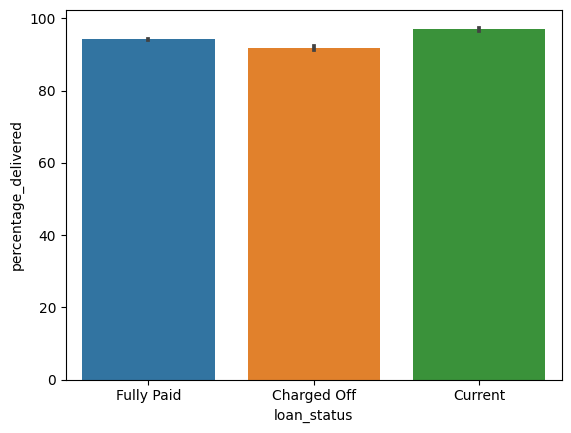

In [94]:
sns.barplot(data=df,x='loan_status',y='percentage_delivered')

<AxesSubplot: xlabel='loan_status', ylabel='loan_amnt_to_income'>

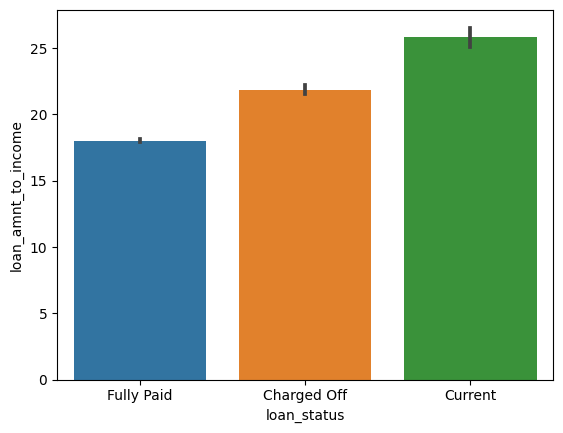

In [95]:
sns.barplot(data=df,x='loan_status',y='loan_amnt_to_income')

<AxesSubplot: xlabel='grade', ylabel='count'>

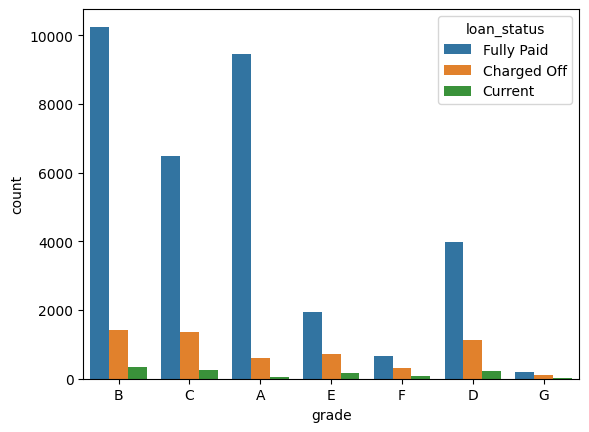

In [96]:
sns.countplot(data=df, x='grade',hue='loan_status')


# Summary of insights

# univariate insights
- most charged off asked loans are around 10000
- most charged off loans have an interest rate of around 10 to 15%, while interest rates start from 5.4% and go all the way up to 24%
- majority of charged off loans fall under  B, C, D grades
- majority of income distribution is around 30000 to 60000
- half of the loan applications were for debt consolidation, meaning people were asking for loan to clear other loans
- amongst the other half
  - credit card debt, small businesses and 'other' purposes were significant
- amongst the charged off loans, dti was distributed mostly between 7.5 to 25%
- According to [Wikipedia](https://www.investopedia.com/terms/d/dti.asp)
  - A DTI of 43% is typically the highest ratio a borrower can have and still get qualified for a mortgage, but lenders generally seek ratios of no more than 36%.
- This shows that, while applying for the loans their dti were up to the standard.
- amongst the loans, about a quarter of loans had applicants with employment of more than 10 years
- more than half of the applications had employment of more than 5 years
- more than 90% of loans don't own a home, they are either living on rent or have an running mortgage
- more than 50% of charged off loans had their income verified

## grade insights
this is an ordered categorical

- as grade increases, average loan amount is increasing 
- as grade increases, average funded amount are increasing
- as grade increases, average term is increasing
- as grade increases, average interest rate is increasing
- as grade increases, average annual income is increasing
- as grade increases, dti is not varying much


## purpose insights
this is an unordered categorical

- maximum loan amounts were asked for debt consolidation and for small businesses
- minimum loan amounts were asked for moving and vacations

## employment length insights
this is an ordered categorical

- as employment length increases, average annual income is increasing
- as employment length increases, requested loan amount is increasing
- as employment length increases, interest rate remained around 13-14%
- as employment length increases, average loan term remained around 45 years
- as employment length increases, dti varied between 13-14%

## home ownership insights
this is an unordered categorical
- Mortgage applicants have higher average annual income
- Mortgage applicants are also the ones asking for higher loans with higher loan terms

## verification status insights
this is an unordered categorical

- verified applicants received close to the amount requested
- surprisingly, unverified income source applicants got loans at a lower interest rate

## compare good with bad loans
- income under 70000 have defaulted more
- people who are already having a mortgage loan or are paying rents are more likely to default
- Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
 - if revol_util is more than 50%, they are likely to default
- small business loans are riskier